In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('train.csv')


In [3]:
df_test=pd.read_csv('test.csv')

In [4]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.isnull().sum().sort_values(ascending=False).head(21)/(len(df_train)-1)*100

PoolQC          99.588759
MiscFeature     96.367375
Alley           93.831391
Fence           80.808773
FireplaceQu     47.292666
LotFrontage     17.751885
GarageYrBlt      5.551748
GarageCond       5.551748
GarageType       5.551748
GarageFinish     5.551748
GarageQual       5.551748
BsmtFinType2     2.604524
BsmtExposure     2.604524
BsmtQual         2.535984
BsmtCond         2.535984
BsmtFinType1     2.535984
MasVnrArea       0.548321
MasVnrType       0.548321
Electrical       0.068540
Id               0.000000
Functional       0.000000
dtype: float64

In [6]:
df_train=df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)
df_test=df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [7]:
df_train.isnull().sum().sort_values(ascending=False).head(21)/(len(df_train)-1)*100

LotFrontage     17.751885
GarageType       5.551748
GarageCond       5.551748
GarageYrBlt      5.551748
GarageFinish     5.551748
GarageQual       5.551748
BsmtFinType2     2.604524
BsmtExposure     2.604524
BsmtFinType1     2.535984
BsmtCond         2.535984
BsmtQual         2.535984
MasVnrArea       0.548321
MasVnrType       0.548321
Electrical       0.068540
PavedDrive       0.000000
WoodDeckSF       0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
dtype: float64

In [8]:
df_train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [9]:
df_train.corr()['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

In [10]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [11]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [12]:
df_train.isnull().sum().sort_values(ascending=False).head(21)/(len(df_train)-1)*100

GarageType      5.551748
GarageYrBlt     5.551748
GarageFinish    5.551748
GarageQual      5.551748
GarageCond      5.551748
BsmtExposure    2.604524
BsmtFinType2    2.604524
BsmtQual        2.535984
BsmtCond        2.535984
BsmtFinType1    2.535984
MasVnrType      0.548321
MasVnrArea      0.548321
Electrical      0.068540
HalfBath        0.000000
FullBath        0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
dtype: float64

In [13]:
df_train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [14]:
df_train.groupby('GarageType').mean()['SalePrice'].sort_values(ascending=False)

GarageType
BuiltIn    254751.738636
Attchd     202892.656322
Basment    160570.684211
2Types     151283.333333
Detchd     134091.162791
CarPort    109962.111111
Name: SalePrice, dtype: float64

In [15]:
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [16]:
df_train.groupby('GarageType')['SalePrice'].mean().sort_values(ascending=False)

GarageType
BuiltIn    254751.738636
Attchd     202892.656322
Basment    160570.684211
2Types     151283.333333
Detchd     134091.162791
CarPort    109962.111111
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

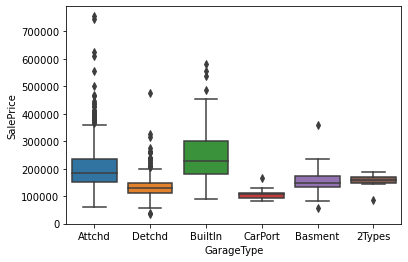

In [17]:
sns.boxplot(x='GarageType',y='SalePrice',data=df_train)

In [18]:
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [19]:
df_train.isnull().sum().sort_values(ascending=False).head(21)/(len(df_train)-1)*100

GarageYrBlt     5.551748
GarageFinish    5.551748
GarageQual      5.551748
GarageCond      5.551748
BsmtExposure    2.604524
BsmtFinType2    2.604524
BsmtFinType1    2.535984
BsmtQual        2.535984
BsmtCond        2.535984
MasVnrArea      0.548321
MasVnrType      0.548321
Electrical      0.068540
TotRmsAbvGrd    0.000000
HalfBath        0.000000
FullBath        0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
dtype: float64

In [20]:
df_train['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

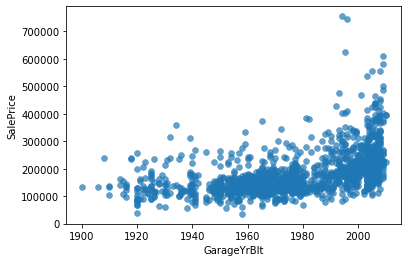

In [21]:
sns.scatterplot(x='GarageYrBlt',y='SalePrice',data=df_train,edgecolor=None,alpha=0.7)

In [22]:
df_train.corr()['GarageYrBlt'].sort_values(ascending=False)

GarageYrBlt      1.000000
YearBuilt        0.825667
YearRemodAdd     0.642277
GarageCars       0.588920
GarageArea       0.564567
OverallQual      0.547766
SalePrice        0.486362
FullBath         0.484557
TotalBsmtSF      0.322445
MasVnrArea       0.252691
1stFlrSF         0.233449
GrLivArea        0.231197
OpenPorchSF      0.228425
WoodDeckSF       0.224577
HalfBath         0.196785
BsmtUnfSF        0.190708
BsmtFinSF1       0.153484
TotRmsAbvGrd     0.148112
BsmtFullBath     0.124553
MSSubClass       0.085072
2ndFlrSF         0.070832
LotFrontage      0.066463
Fireplaces       0.046822
3SsnPorch        0.023544
MoSold           0.005337
Id               0.000072
YrSold          -0.001014
PoolArea        -0.014501
LotArea         -0.024947
MiscVal         -0.032417
LowQualFinSF    -0.036363
BedroomAbvGr    -0.064518
ScreenPorch     -0.075418
BsmtHalfBath    -0.077464
BsmtFinSF2      -0.088011
KitchenAbvGr    -0.124411
EnclosedPorch   -0.297003
OverallCond     -0.324297
Name: Garage

In [23]:
df_train=df_train.drop('GarageYrBlt',axis=1)
df_test=df_test.drop('GarageYrBlt',axis=1)

In [24]:
df_train.isnull().sum().sort_values(ascending=False).head(21)/(len(df_train)-1)*100

GarageFinish    5.551748
GarageQual      5.551748
GarageCond      5.551748
BsmtFinType2    2.604524
BsmtExposure    2.604524
BsmtCond        2.535984
BsmtFinType1    2.535984
BsmtQual        2.535984
MasVnrArea      0.548321
MasVnrType      0.548321
Electrical      0.068540
FullBath        0.000000
KitchenQual     0.000000
BsmtHalfBath    0.000000
HalfBath        0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
dtype: float64

In [25]:
df_train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

The null values are just no garage

In [26]:
df_train[['GarageFinish','GarageQual','GarageCond']] = df_train[['GarageFinish','GarageQual','GarageCond']].fillna(value='None')
df_test[['GarageFinish','GarageQual','GarageCond']] = df_test[['GarageFinish','GarageQual','GarageCond']].fillna(value='None')

In [27]:
df_train.isnull().sum().sort_values(ascending=False).head(21)/(len(df_train)-1)*100

BsmtExposure    2.604524
BsmtFinType2    2.604524
BsmtQual        2.535984
BsmtCond        2.535984
BsmtFinType1    2.535984
MasVnrType      0.548321
MasVnrArea      0.548321
Electrical      0.068540
FullBath        0.000000
BsmtHalfBath    0.000000
Functional      0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
HalfBath        0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Id              0.000000
dtype: float64

In [28]:
df_train['GarageQual'].value_counts()

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64

In [29]:
df_train[['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']] = df_train[['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']].fillna(value='None')
df_test[['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']] = df_test[['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']].fillna(value='None')

In [30]:
df_train.isnull().sum().sort_values(ascending=False).head(21)/(len(df_train)-1)*100

MasVnrType      0.548321
MasVnrArea      0.548321
Electrical      0.068540
Id              0.000000
HalfBath        0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
FullBath        0.000000
HeatingQC       0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
1stFlrSF        0.000000
Fireplaces      0.000000
GarageType      0.000000
GarageFinish    0.000000
dtype: float64

In [31]:
df_train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [32]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [33]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

In [34]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [35]:
df_train.shape

(1451, 75)

In [36]:
df_test.shape

(1432, 74)

In [37]:
df_train.isnull().sum().sort_values(ascending=False).head(2)

Id            0
GarageType    0
dtype: int64

Now we are done with NULL Values, now we need to deal with categorical columns

In [38]:
df_train=df_train.drop('Id',axis=1)
df_test=df_test.drop('Id',axis=1)

In [39]:
df_train['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

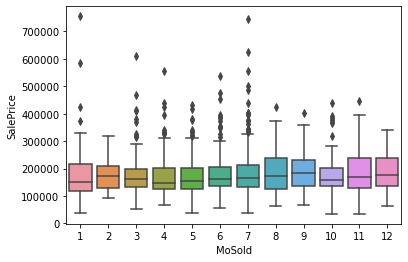

In [40]:
sns.boxplot(x='MoSold',y='SalePrice',data=df_train)

In [41]:
df_train=df_train.drop('MoSold',axis=1)
df_test=df_test.drop('MoSold',axis=1)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

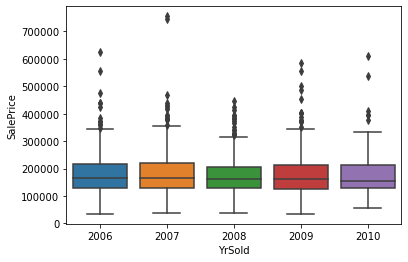

In [42]:
sns.boxplot(x='YrSold',y='SalePrice',data=df_train)

In [43]:
df_train.groupby('YrSold').mean()['SalePrice']

YrSold
2006    181647.060703
2007    185976.308869
2008    177084.150000
2009    179415.878338
2010    177168.925287
Name: SalePrice, dtype: float64

In [44]:
df_train=df_train.drop('YrSold',axis=1)
df_test=df_test.drop('YrSold',axis=1)

In [45]:
df_train['GarageCars'].value_counts()

2    816
1    369
3    180
0     81
4      5
Name: GarageCars, dtype: int64

In [46]:
df_train.corr()['GarageCars']['GarageArea']

0.8824696531998583

In [47]:
df_train=df_train.drop('GarageCars',axis=1)
df_test=df_test.drop('GarageCars',axis=1)

In [48]:
df_train['MiscVal']

0          0
1          0
2          0
3          0
4          0
        ... 
1455       0
1456       0
1457    2500
1458       0
1459       0
Name: MiscVal, Length: 1451, dtype: int64

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

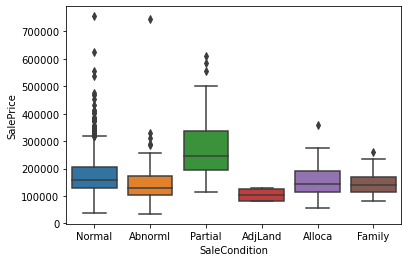

In [49]:
sns.boxplot(x='SaleCondition',y='SalePrice',data=df_train)

In [50]:
df_train.shape

(1451, 71)

In [51]:
df_test.shape

(1432, 70)

In [52]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [53]:
le=LabelEncoder()

In [54]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch

In [55]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch

In [56]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
PoolArea           int64
MiscVal            int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 71, dtype: object

In [57]:
x=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']

In [58]:
cat_train= x.select_dtypes(include='object')
cat_train.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [59]:
x['MSZoning']=le.fit_transform(x['MSZoning'])
x['Street']=le.fit_transform(x['Street'])
x['LotShape']=le.fit_transform(x['LotShape'])
x['LandContour']=le.fit_transform(x['LandContour'])
x['Utilities']=le.fit_transform(x['Utilities'])
x['LotConfig']=le.fit_transform(x['LotConfig'])
x['LandSlope']=le.fit_transform(x['LandSlope'])
x['Neighborhood']=le.fit_transform(x['Neighborhood'])
x['Condition1']=le.fit_transform(x['Condition1'])
x['Condition2']=le.fit_transform(x['Condition2'])
x['BldgType']=le.fit_transform(x['BldgType'])
x['HouseStyle']=le.fit_transform(x['HouseStyle'])
x['RoofStyle']=le.fit_transform(x['RoofStyle'])
x['RoofMatl']=le.fit_transform(x['RoofMatl'])
x['Exterior1st']=le.fit_transform(x['Exterior1st'])
x['Exterior2nd']=le.fit_transform(x['Exterior2nd'])
x['MasVnrType']=le.fit_transform(x['MasVnrType'])
x['ExterQual']=le.fit_transform(x['ExterQual'])
x['ExterCond']=le.fit_transform(x['ExterCond'])
x['Foundation']=le.fit_transform(x['Foundation'])
x['BsmtQual']=le.fit_transform(x['BsmtQual'])
x['BsmtCond']=le.fit_transform(x['BsmtCond'])
x['BsmtExposure']=le.fit_transform(x['BsmtExposure'])
x['BsmtFinType1']=le.fit_transform(x['BsmtFinType1'])
x['BsmtFinType2']=le.fit_transform(x['BsmtFinType2'])
x['Heating']=le.fit_transform(x['Heating'])
x['HeatingQC']=le.fit_transform(x['HeatingQC'])
x['CentralAir']=le.fit_transform(x['CentralAir'])
x['Electrical']=le.fit_transform(x['Electrical'])
x['KitchenQual']=le.fit_transform(x['KitchenQual'])
x['Functional']=le.fit_transform(x['Functional'])
x['GarageType']=le.fit_transform(x['GarageType'])
x['GarageFinish']=le.fit_transform(x['GarageFinish'])
x['GarageQual']=le.fit_transform(x['GarageQual'])
x['GarageCond']=le.fit_transform(x['GarageCond'])
x['PavedDrive']=le.fit_transform(x['PavedDrive'])
x['SaleType']=le.fit_transform(x['SaleType'])
x['SaleCondition']=le.fit_transform(x['SaleCondition'])

In [60]:
df_test['MSZoning']=le.fit_transform(df_test['MSZoning'])
df_test['Street']=le.fit_transform(df_test['Street'])
df_test['LotShape']=le.fit_transform(df_test['LotShape'])
df_test['LandContour']=le.fit_transform(df_test['LandContour'])
df_test['Utilities']=le.fit_transform(df_test['Utilities'])
df_test['LotConfig']=le.fit_transform(df_test['LotConfig'])
df_test['LandSlope']=le.fit_transform(df_test['LandSlope'])
df_test['Neighborhood']=le.fit_transform(df_test['Neighborhood'])
df_test['Condition1']=le.fit_transform(df_test['Condition1'])
df_test['Condition2']=le.fit_transform(df_test['Condition2'])
df_test['BldgType']=le.fit_transform(df_test['BldgType'])
df_test['HouseStyle']=le.fit_transform(df_test['HouseStyle'])
df_test['RoofStyle']=le.fit_transform(df_test['RoofStyle'])
df_test['RoofMatl']=le.fit_transform(df_test['RoofMatl'])
df_test['Exterior1st']=le.fit_transform(df_test['Exterior1st'])
df_test['Exterior2nd']=le.fit_transform(df_test['Exterior2nd'])
df_test['MasVnrType']=le.fit_transform(df_test['MasVnrType'])
df_test['ExterQual']=le.fit_transform(df_test['ExterQual'])
df_test['ExterCond']=le.fit_transform(df_test['ExterCond'])
df_test['Foundation']=le.fit_transform(df_test['Foundation'])
df_test['BsmtQual']=le.fit_transform(df_test['BsmtQual'])
df_test['BsmtCond']=le.fit_transform(df_test['BsmtCond'])
df_test['BsmtExposure']=le.fit_transform(df_test['BsmtExposure'])
df_test['BsmtFinType1']=le.fit_transform(df_test['BsmtFinType1'])
df_test['BsmtFinType2']=le.fit_transform(df_test['BsmtFinType2'])
df_test['Heating']=le.fit_transform(df_test['Heating'])
df_test['HeatingQC']=le.fit_transform(df_test['HeatingQC'])
df_test['CentralAir']=le.fit_transform(df_test['CentralAir'])
df_test['Electrical']=le.fit_transform(df_test['Electrical'])
df_test['KitchenQual']=le.fit_transform(df_test['KitchenQual'])
df_test['Functional']=le.fit_transform(df_test['Functional'])
df_test['GarageType']=le.fit_transform(df_test['GarageType'])
df_test['GarageFinish']=le.fit_transform(df_test['GarageFinish'])
df_test['GarageQual']=le.fit_transform(df_test['GarageQual'])
df_test['GarageCond']=le.fit_transform(df_test['GarageCond'])
df_test['PavedDrive']=le.fit_transform(df_test['PavedDrive'])
df_test['SaleType']=le.fit_transform(df_test['SaleType'])
df_test['SaleCondition']=le.fit_transform(df_test['SaleCondition'])

In [61]:
df_test.isnull().sum().sort_values(ascending=False).head(50)

MSSubClass       0
GrLivArea        0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
LowQualFinSF     0
TotRmsAbvGrd     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
KitchenQual      0
Functional       0
MSZoning         0
OpenPorchSF      0
SaleType         0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
WoodDeckSF       0
Fireplaces       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageFinish     0
GarageType       0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
LandSlope        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
BsmtFinType2     0
Utilities        0
LandContour      0
LotShape         0
Street           0
dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=MinMaxScaler()
x=x.values
y=y.values
df_test=df_test.values

In [64]:
X_train=scaler.fit_transform(x)
X_test=scaler.transform(df_test)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as mse

In [66]:
model_rf=RandomForestRegressor(n_estimators=500)
model_rf.fit(x,y)

ypred_rf=model_rf.predict(df_test)

print('Training Score of RF: ',model_rf.score(x,y))

Training Score of RF:  0.9825362356448761


In [67]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(criterion='mse')
model_dt.fit(x,y)
ypred_dt=model_dt.predict(df_test)
model_dt.score(x,y)

c:\Users\ZAIDI Mohamed Arysse\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.9999969164902857